# 가공식품 해외제조업체 Quick-EDA
<img src='https://images.unsplash.com/photo-1649771482867-21eaffe6fcd0?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxOXx8fGVufDB8fHx8&auto=format&fit=crop&w=500&q=60'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Imports
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'

In [2]:
def summary(df):
    
    return pd.DataFrame({
        '데이터형태(dtypes)':{col:df[col].dtype for col in df},
        '고유값 수(nunique)':{col:len(df[col].unique()) for col in df},
        '결측치 비율(%)':{col:str(round(sum(df[col].isna())/len(df),2)*100)+'%' for col in df},
        '중복건수':{col:sum(df[col].duplicated()) for col in df},
        '자료 내용(contents)':{col:df[col].unique() for col in df},
                 })

# 1. 데이터 확보

# 필요한 변수만 채택

In [3]:
path = r'D:\smart food\data'

df = pd.read_excel(path + '/가공식품_수입식품(16년~21년).xlsx')

df.to_pickle(path + '/가공식품_수입식품(16년~21년).pkl')

In [4]:
df = pd.read_pickle(path + '/가공식품_수입식품(16년~21년).pkl')
df.shape
cols= ['접수번호', '접수일', '신고시기', '품목명', '용도명', '제조국(원산지)', '순중량(Kg)', '과세가격', '과세가격($/Kg)', 
       '해외제조업소 등록번호', '해외제조업소명', '판정결과', '검사종류 대분류명', '검사종류']
df =df[cols]
df.head()

(714413, 65)

,접수번호,접수일,신고시기,품목명,용도명,제조국(원산지),순중량(Kg),과세가격,과세가격($/Kg),해외제조업소 등록번호,해외제조업소명,판정결과,검사종류 대분류명,검사종류
0,20160121820,2016-03-21 14:26:26,본신고,기타가공품,판매용,미국,500.0,14500.0,29.000,US000001872,"ADVANCED NUTRACEUTICALS, LLC",반려,무작위표본,무작위(동일사 동일식품등)
1,201600214072,2016-05-31 09:50:09,본신고,서류가공품,판매용,캐나다,19440.0,24073.2,1.238,CA000000161,CAVENDISH FARMS CORPORATION,적합,무작위표본,무작위(자체계획에 의한 검사)
2,201600217150,2016-06-02 09:28:22,본신고,청주,판매용,일본,25920.0,94247.0,3.636,JP000000103,"HAKURYU SHUZOU CO.,LTD",적합,정밀,정밀(본부 지시에 의한 검사)
3,201600231480,2016-06-14 11:35:10,본신고,소스류,판매용,중국,1512.0,3030.0,2.004,CN000009849,GUIYANG NANMING LAOGANMA SPECIAL FLAVOUR FOODS...,적합,무작위표본,무작위(검사강화 국가별품목)
4,20160085048,2016-02-18 09:21:09,본신고,과실주,판매용,프랑스,180.0,1032.0,5.733,FR000002118,MICHEL LYNCH,적합,무작위표본,무작위(동일사 동일식품등)


In [5]:
df['판정결과'].value_counts()

적합                             700138
자진 취하                            7877
부적합                              5452
반려                                924
부적합처분 취소(철회)에 따른 재검사 재판정 적합        16
수입신고 철회                             6
Name: 판정결과, dtype: int64

In [6]:
df = df[~df.duplicated('접수번호')]
summary(df)

,데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,자료 내용(contents)
접수번호,int64,423589,0.0%,0,"[20160121820, 201600214072, 201600217150, 2016..."
접수일,object,419793,0.0%,3796,"[2016-03-21 14:26:26, 2016-05-31 09:50:09, 201..."
신고시기,object,2,0.0%,423587,"[본신고, 사전신고]"
품목명,object,318,0.0%,423271,"[기타가공품, 서류가공품, 청주, 소스류, 과실주, 만두류, 캔디류(젤리), 과자(..."
용도명,object,9,0.0%,423580,"[판매용, 자사제품제조용, 외화획득용 원료, 판매용(식용향료), 반송품(기타), 반..."
제조국(원산지),object,138,0.0%,423451,"[미국, 캐나다, 일본, 중국, 프랑스, 독일, 스위스, 인도네시아, 벨기에, 체코..."
순중량(Kg),float64,47580,0.0%,376009,"[500.0, 19440.0, 25920.0, 1512.0, 180.0, 2160...."
과세가격,float64,144679,0.0%,278910,"[14500.0, 24073.2, 94247.0, 3030.0, 1032.0, 98..."
과세가격($/Kg),float64,48614,0.0%,374975,"[29.0, 1.238, 3.636, 2.004, 5.733000000000001,..."
해외제조업소 등록번호,object,35441,0.0%,388148,"[US000001872, CA000000161, JP000000103, CN0000..."


In [7]:
df = df[((df['판정결과'] == '적합') | (df['판정결과'] == '부적합')) | (df['판정결과'] == '자진 취하')]
df = df.replace({'부적합' :1, '자진 취하': 1, '적합' :0})
df['판정결과'] = df['판정결과'].astype('int')
summary(df)

,데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,자료 내용(contents)
접수번호,int64,423039,0.0%,0,"[201600214072, 201600217150, 201600231480, 201..."
접수일,object,419248,0.0%,3791,"[2016-05-31 09:50:09, 2016-06-02 09:28:22, 201..."
신고시기,object,2,0.0%,423037,"[본신고, 사전신고]"
품목명,object,318,0.0%,422721,"[서류가공품, 청주, 소스류, 과실주, 만두류, 캔디류(젤리), 과자(비스킷), 밀..."
용도명,object,9,0.0%,423030,"[판매용, 자사제품제조용, 외화획득용 원료, 판매용(식용향료), 반송품(기타), 반..."
제조국(원산지),object,138,0.0%,422901,"[캐나다, 일본, 중국, 프랑스, 독일, 스위스, 미국, 인도네시아, 벨기에, 체코..."
순중량(Kg),float64,47557,0.0%,375482,"[19440.0, 25920.0, 1512.0, 180.0, 2160.0, 480...."
과세가격,float64,144619,0.0%,278420,"[24073.2, 94247.0, 3030.0, 1032.0, 9807.0, 271..."
과세가격($/Kg),float64,48585,0.0%,374454,"[1.238, 3.636, 2.004, 5.733000000000001, 4.54,..."
해외제조업소 등록번호,object,35405,0.0%,387634,"[CA000000161, JP000000103, CN000009849, FR0000..."


In [8]:
df['해외제조업소명'] = df['해외제조업소명'].replace({'\t' : ''}).replace({'?':''}).replace({'？':''})

### 업체별 부적합률(Target mean)

In [9]:
df['업체부적합률']=df['해외제조업소 등록번호'].map(df.groupby('해외제조업소 등록번호')['판정결과'].sum()/df.groupby('해외제조업소 등록번호').size()*100)

In [10]:
co_unfit = df.groupby('해외제조업소 등록번호')['판정결과'].sum()/df.groupby('해외제조업소 등록번호').size()
data = pd.DataFrame(co_unfit, columns=['부적합율'])
data.shape

(35405, 1)

In [11]:
data[data['부적합율'] > 0]
data[data['부적합율'] > 0].shape[0]/len(df)*100

,부적합율
해외제조업소 등록번호,
AE000000125,0.285714
AE000000129,0.250000
AE000000130,0.038462
AE000000149,0.333333
AM000000006,0.050000
...,...
ZA000000983,0.166667
ZA000001002,0.200000
ZA000001019,0.666667


0.9507397663099619

In [12]:
data.sample(100).sort_values('부적합율')

,부적합율
해외제조업소 등록번호,
IT000003490,0.000000
CN000000376,0.000000
ID000006703,0.000000
ES000002080,0.000000
AR000001287,0.000000
...,...
VN000001286,0.058824
MM000000009,0.076923
CN000004744,0.078431


<AxesSubplot:xlabel='해외제조업소 등록번호'>

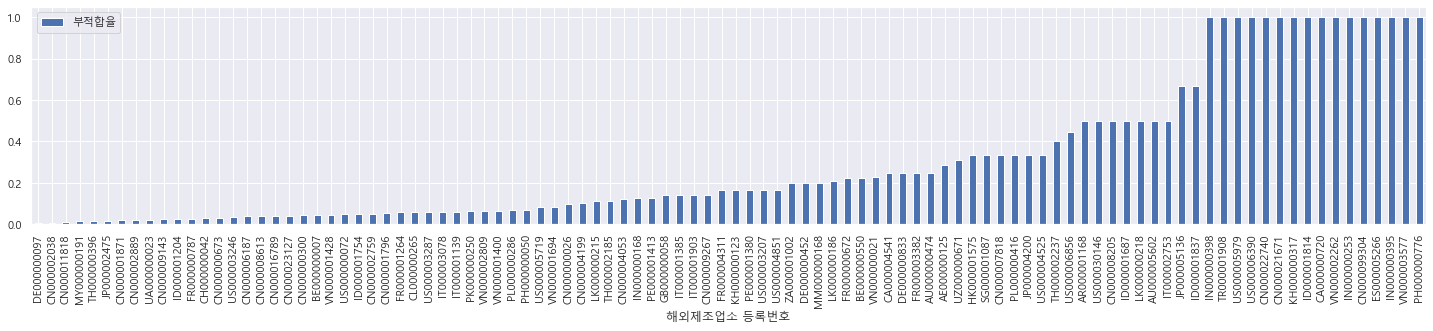

In [13]:
data = data[data['부적합율'] > 0]
data.sample(100).sort_values('부적합율').plot(kind='bar', figsize=(25, 4))

In [14]:
df.columns

Index(['접수번호', '접수일', '신고시기', '품목명', '용도명', '제조국(원산지)', '순중량(Kg)', '과세가격',
       '과세가격($/Kg)', '해외제조업소 등록번호', '해외제조업소명', '판정결과', '검사종류 대분류명', '검사종류',
       '업체부적합률'],
      dtype='object')

In [15]:
df['수입중량'] = df['해외제조업소 등록번호'].map(df.groupby(['해외제조업소 등록번호'])['순중량(Kg)'].sum())
df.head()

,접수번호,접수일,신고시기,품목명,용도명,제조국(원산지),순중량(Kg),과세가격,과세가격($/Kg),해외제조업소 등록번호,해외제조업소명,판정결과,검사종류 대분류명,검사종류,업체부적합률,수입중량
1,201600214072,2016-05-31 09:50:09,본신고,서류가공품,판매용,캐나다,19440.0,24073.2,1.238,CA000000161,CAVENDISH FARMS CORPORATION,0,무작위표본,무작위(자체계획에 의한 검사),2.564103,1465726.00
2,201600217150,2016-06-02 09:28:22,본신고,청주,판매용,일본,25920.0,94247.0,3.636,JP000000103,"HAKURYU SHUZOU CO.,LTD",0,정밀,정밀(본부 지시에 의한 검사),0.000000,2861145.86
3,201600231480,2016-06-14 11:35:10,본신고,소스류,판매용,중국,1512.0,3030.0,2.004,CN000009849,GUIYANG NANMING LAOGANMA SPECIAL FLAVOUR FOODS...,0,무작위표본,무작위(검사강화 국가별품목),1.980198,257673.12
4,20160085048,2016-02-18 09:21:09,본신고,과실주,판매용,프랑스,180.0,1032.0,5.733,FR000002118,MICHEL LYNCH,0,무작위표본,무작위(동일사 동일식품등),0.000000,2880.00
5,20160081852,2016-02-16 09:40:21,본신고,만두류,판매용,중국,2160.0,9807.0,4.540,CN000080574,"QINGDAO LONG YUAN FA FOODS CO.,LTD",0,무작위표본,무작위(동일사 동일식품등),0.000000,13025.20


In [16]:
df['수입가격'] = df['해외제조업소 등록번호'].map(df.groupby(['해외제조업소 등록번호'])['과세가격'].sum())
df.head()

,접수번호,접수일,신고시기,품목명,용도명,제조국(원산지),순중량(Kg),과세가격,과세가격($/Kg),해외제조업소 등록번호,해외제조업소명,판정결과,검사종류 대분류명,검사종류,업체부적합률,수입중량,수입가격
1,201600214072,2016-05-31 09:50:09,본신고,서류가공품,판매용,캐나다,19440.0,24073.2,1.238,CA000000161,CAVENDISH FARMS CORPORATION,0,무작위표본,무작위(자체계획에 의한 검사),2.564103,1465726.00,2264525.26
2,201600217150,2016-06-02 09:28:22,본신고,청주,판매용,일본,25920.0,94247.0,3.636,JP000000103,"HAKURYU SHUZOU CO.,LTD",0,정밀,정밀(본부 지시에 의한 검사),0.000000,2861145.86,10693708.00
3,201600231480,2016-06-14 11:35:10,본신고,소스류,판매용,중국,1512.0,3030.0,2.004,CN000009849,GUIYANG NANMING LAOGANMA SPECIAL FLAVOUR FOODS...,0,무작위표본,무작위(검사강화 국가별품목),1.980198,257673.12,640565.43
4,20160085048,2016-02-18 09:21:09,본신고,과실주,판매용,프랑스,180.0,1032.0,5.733,FR000002118,MICHEL LYNCH,0,무작위표본,무작위(동일사 동일식품등),0.000000,2880.00,17718.00
5,20160081852,2016-02-16 09:40:21,본신고,만두류,판매용,중국,2160.0,9807.0,4.540,CN000080574,"QINGDAO LONG YUAN FA FOODS CO.,LTD",0,무작위표본,무작위(동일사 동일식품등),0.000000,13025.20,38099.00


In [18]:
df.columns

Index(['접수번호', '접수일', '신고시기', '품목명', '용도명', '제조국(원산지)', '순중량(Kg)', '과세가격',
       '과세가격($/Kg)', '해외제조업소 등록번호', '해외제조업소명', '판정결과', '검사종류 대분류명', '검사종류',
       '업체부적합률', '수입중량', '수입가격'],
      dtype='object')

In [20]:
data = df[['접수번호', '품목명', '제조국(원산지)', '해외제조업소 등록번호', '해외제조업소명', '판정결과', '업체부적합률', '수입중량', '수입가격']]
data.head()

,접수번호,품목명,제조국(원산지),해외제조업소 등록번호,해외제조업소명,판정결과,업체부적합률,수입중량,수입가격
1,201600214072,서류가공품,캐나다,CA000000161,CAVENDISH FARMS CORPORATION,0,2.564103,1465726.00,2264525.26
2,201600217150,청주,일본,JP000000103,"HAKURYU SHUZOU CO.,LTD",0,0.000000,2861145.86,10693708.00
3,201600231480,소스류,중국,CN000009849,GUIYANG NANMING LAOGANMA SPECIAL FLAVOUR FOODS...,0,1.980198,257673.12,640565.43
4,20160085048,과실주,프랑스,FR000002118,MICHEL LYNCH,0,0.000000,2880.00,17718.00
5,20160081852,만두류,중국,CN000080574,"QINGDAO LONG YUAN FA FOODS CO.,LTD",0,0.000000,13025.20,38099.00


In [25]:
data = data[~data.duplicated('해외제조업소 등록번호')]
data.shape
data

(35405, 9)

,접수번호,품목명,제조국(원산지),해외제조업소 등록번호,해외제조업소명,판정결과,업체부적합률,수입중량,수입가격
1,201600214072,서류가공품,캐나다,CA000000161,CAVENDISH FARMS CORPORATION,0,2.564103,1465726.00,2264525.26
2,201600217150,청주,일본,JP000000103,"HAKURYU SHUZOU CO.,LTD",0,0.000000,2861145.86,10693708.00
3,201600231480,소스류,중국,CN000009849,GUIYANG NANMING LAOGANMA SPECIAL FLAVOUR FOODS...,0,1.980198,257673.12,640565.43
4,20160085048,과실주,프랑스,FR000002118,MICHEL LYNCH,0,0.000000,2880.00,17718.00
5,20160081852,만두류,중국,CN000080574,"QINGDAO LONG YUAN FA FOODS CO.,LTD",0,0.000000,13025.20,38099.00
...,...,...,...,...,...,...,...,...,...
713663,202100349668,기타 수산물가공품,태국,TH000007060,"KYOKUYO GLOBAL SEAFOODS CO., LTD.",0,0.000000,15158.00,263577.60
713759,202100107259,효모음료,벨기에,BE000001521,FORCE MAJEURE,1,100.000000,190.00,587.00
713861,202100132148,효모식품,미국,US000032795,NUTRACEUTICAL CORPORATION,1,100.000000,149.76,2808.00
714181,202100094057,커피(기타),인도,IN000004870,ITC LIMITED,0,0.000000,108.00,1296.00


In [43]:
co = data[data['업체부적합률'] > 0]
co.head()

,접수번호,품목명,제조국(원산지),해외제조업소 등록번호,해외제조업소명,판정결과,업체부적합률,수입중량,수입가격
1,201600214072,서류가공품,캐나다,CA000000161,CAVENDISH FARMS CORPORATION,0,2.564103,1.465726e+06,2.264525e+06
3,201600231480,소스류,중국,CN000009849,GUIYANG NANMING LAOGANMA SPECIAL FLAVOUR FOODS...,0,1.980198,2.576731e+05,6.405654e+05
6,20160087342,캔디류(젤리),독일,DE000000097,HARIBO GMBH & CO. KG,0,0.588620,1.109844e+07,5.059109e+07
8,201600240618,밀크초콜릿,스위스,CH000000056,LINDT & SPRUNGLI (SCHWEIZ)AG,0,1.219512,5.188401e+04,8.645517e+05
13,20160134223,서류가공품,미국,US000000724,"CONAGRA FOODS LAMB WESTON, INC.",0,2.857143,6.348528e+05,8.107055e+05


In [44]:
co[['업체부적합률', '수입중량', '수입가격']].corr()

,업체부적합률,수입중량,수입가격
업체부적합률,1.000000,-0.081038,-0.130933
수입중량,-0.081038,1.000000,0.747661
수입가격,-0.130933,0.747661,1.000000


<AxesSubplot:xlabel='수입중량', ylabel='수입가격'>

No handles with labels found to put in legend.


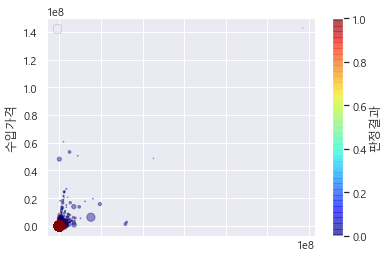

In [45]:
co.plot(kind="scatter", x="수입중량", y="수입가격", alpha=0.4,
    s='업체부적합률',
    c="판정결과", cmap=plt.get_cmap("jet"), colorbar=True,
    )
plt.legend()

<AxesSubplot:>

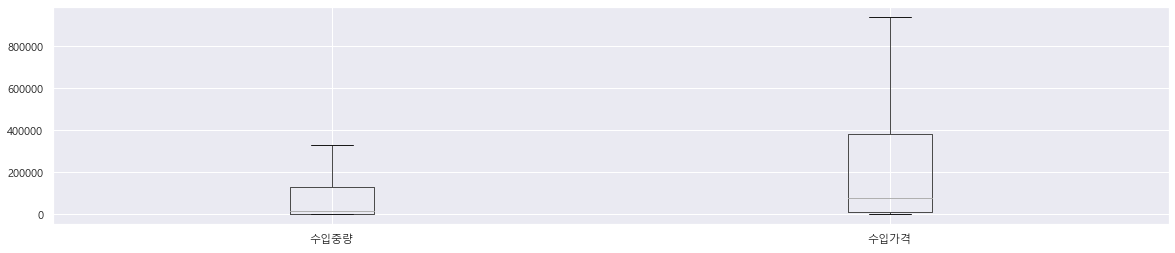

In [48]:
suspects = ['수입중량', '수입가격']
co.boxplot(column=suspects , figsize=(20,4))

In [47]:
def Outliers(col):
    q1, q3 =col.quantile(0.25), col.quantile(0.75)
    iqr = q3 - q1
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr  
    outliers = col[(col < l_fence) | (col > u_fence)]
    col[(col < l_fence)] = l_fence; col[(col > u_fence)] = u_fence  
    print(col.name,'의 총 이상치 관측 수:', outliers.count())
    print('Lower fence: ', l_fence, 'Upper fence: ', u_fence) #filtering = col.drop(outliers.index, axis = 0)
    return col

for col in suspects :
    co[col] = Outliers(co[col])

<ipython-input-47-d80ac77f8993>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[(col < l_fence)] = l_fence; col[(col > u_fence)] = u_fence
<ipython-input-47-d80ac77f8993>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[(col < l_fence)] = l_fence; col[(col > u_fence)] = u_fence
<ipython-input-47-d80ac77f8993>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[(col < l_fence)] = l_fence; col[(col > u_fence)] = u_fence
<ipytho

수입중량 의 총 이상치 관측 수: 608
Lower fence:  -194765.1375 Upper fence:  328492.3425
수입가격 의 총 이상치 관측 수: 518
Lower fence:  -543837.472 Upper fence:  938415.1199999999


<ipython-input-47-d80ac77f8993>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[(col < l_fence)] = l_fence; col[(col > u_fence)] = u_fence
<ipython-input-47-d80ac77f8993>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co[col] = Outliers(co[col])


<AxesSubplot:xlabel='수입중량', ylabel='수입가격'>

Text(0.5, 0, '수입중량')

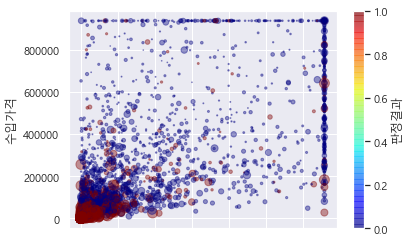

In [52]:
co.plot(kind="scatter", x="수입중량", y="수입가격", alpha=0.4,
    s='업체부적합률',
    c="판정결과", cmap=plt.get_cmap("jet"), colorbar=True,
    )
plt.xlabel('수입중량')

Text(0.5, 1.0, '적합/부적합 분포_수입중량기준')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


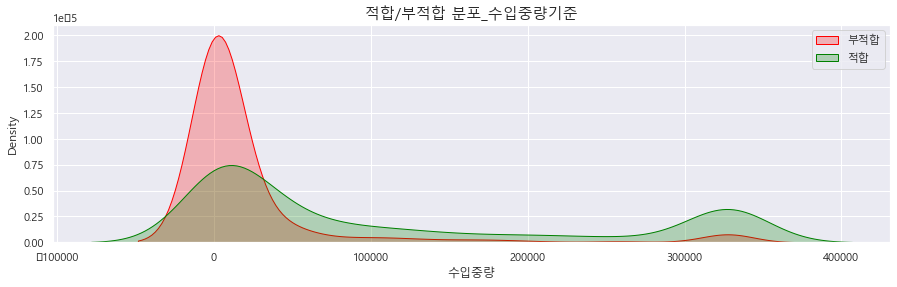

In [58]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(co.loc[(co['판정결과'] == 1), '수입중량'], color='red', shade=True, label='부적합')
ax=sns.kdeplot(co.loc[(df['판정결과'] == 0), '수입중량'], color='green', shade=True, label='적합')
plt.title('적합/부적합 분포_수입중량기준', fontsize = 15)
plt.legend()

Text(0.5, 1.0, '적합/부적합 비율_수입가격')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


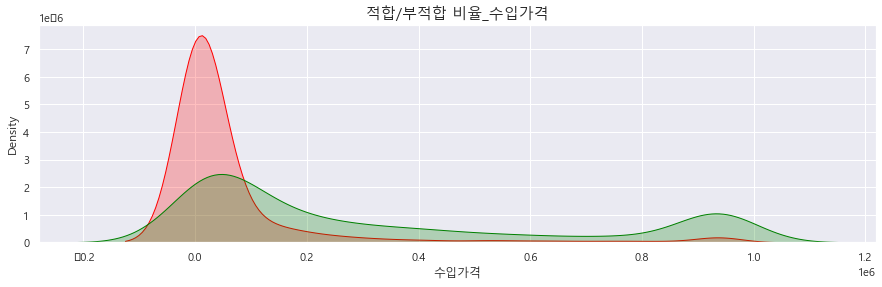

In [59]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(co.loc[(co['판정결과'] == 1), '수입가격'], color='red', shade=True, label='부적합')
ax=sns.kdeplot(co.loc[(df['판정결과'] == 0), '수입가격'], color='green', shade=True, label='적합')
plt.title('적합/부적합 비율_수입가격', fontsize = 15)

# End